# Chapter 5. The Maximal Overlap Discrete Wavelet Transform

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append("../src")
import DWT
from MODWT import get_DS, pyramid

## 5.7 Example: Electrocardiogram data

In [3]:
def test1():
    """
    Reproduce plot of Figure 183 from WMTSA

    Input:
        None
    Output:
        None
    """
    X = np.loadtxt('../data/heart.dat')
    N = np.shape(X)[0]
    L = 8
    (W, V) = pyramid(X, 'LA8', 6)
    (nuH, nuG) = DWT.get_nu('LA8', 6)
    plt.figure(1, figsize=(15, 32))
    plt.subplot2grid((8, 1), (7, 0))
    dt = 1.0 / 180.0
    t = dt * np.arange(0, N)
    plt.plot(t, X, 'k', label='X')
    plt.xlim([np.min(t), np.max(t)])
    plt.legend(loc=1)
    for j in range(0, 6):
        plt.subplot2grid((8, 1), (6 - j, 0))
        plt.plot(t, np.roll(W[j], nuH[j]), 'k', label='T' + str(nuH[j]) + 'W' + str(j + 1))
        Lj = (2 ** (j + 1) - 1) * (L - 1) + 1
        plt.axvline(dt * (Lj - 2 - abs(nuH[j])), linewidth=1, color='red')
        plt.axvline(dt * (N - abs(nuH[j])), linewidth=1, color='red')
        plt.xlim([np.min(t), np.max(t)])
        plt.legend(loc=1)
    plt.subplot2grid((8, 1), (0, 0))
    plt.plot(t, np.roll(V, nuG[5]), 'k', label='T' + str(nuG[5]) + 'V6')
    Lj = (2 ** 6 - 1) * (L - 1) + 1
    plt.axvline(dt * (Lj - 2 - abs(nuG[j])), linewidth=1, color='red')
    plt.axvline(dt * (N - abs(nuG[j])), linewidth=1, color='red')
    plt.xlim([np.min(t), np.max(t)])
    plt.legend(loc=1)
    plt.title('MODWT of ECG time series')
    plt.savefig('../figures/MODWT/ECG_WV.eps', format='eps')
    plt.show()

Compute MODWT coefficients of the ECG time series from WMTSA.

Reproduce Figure 183 in WMTSA.

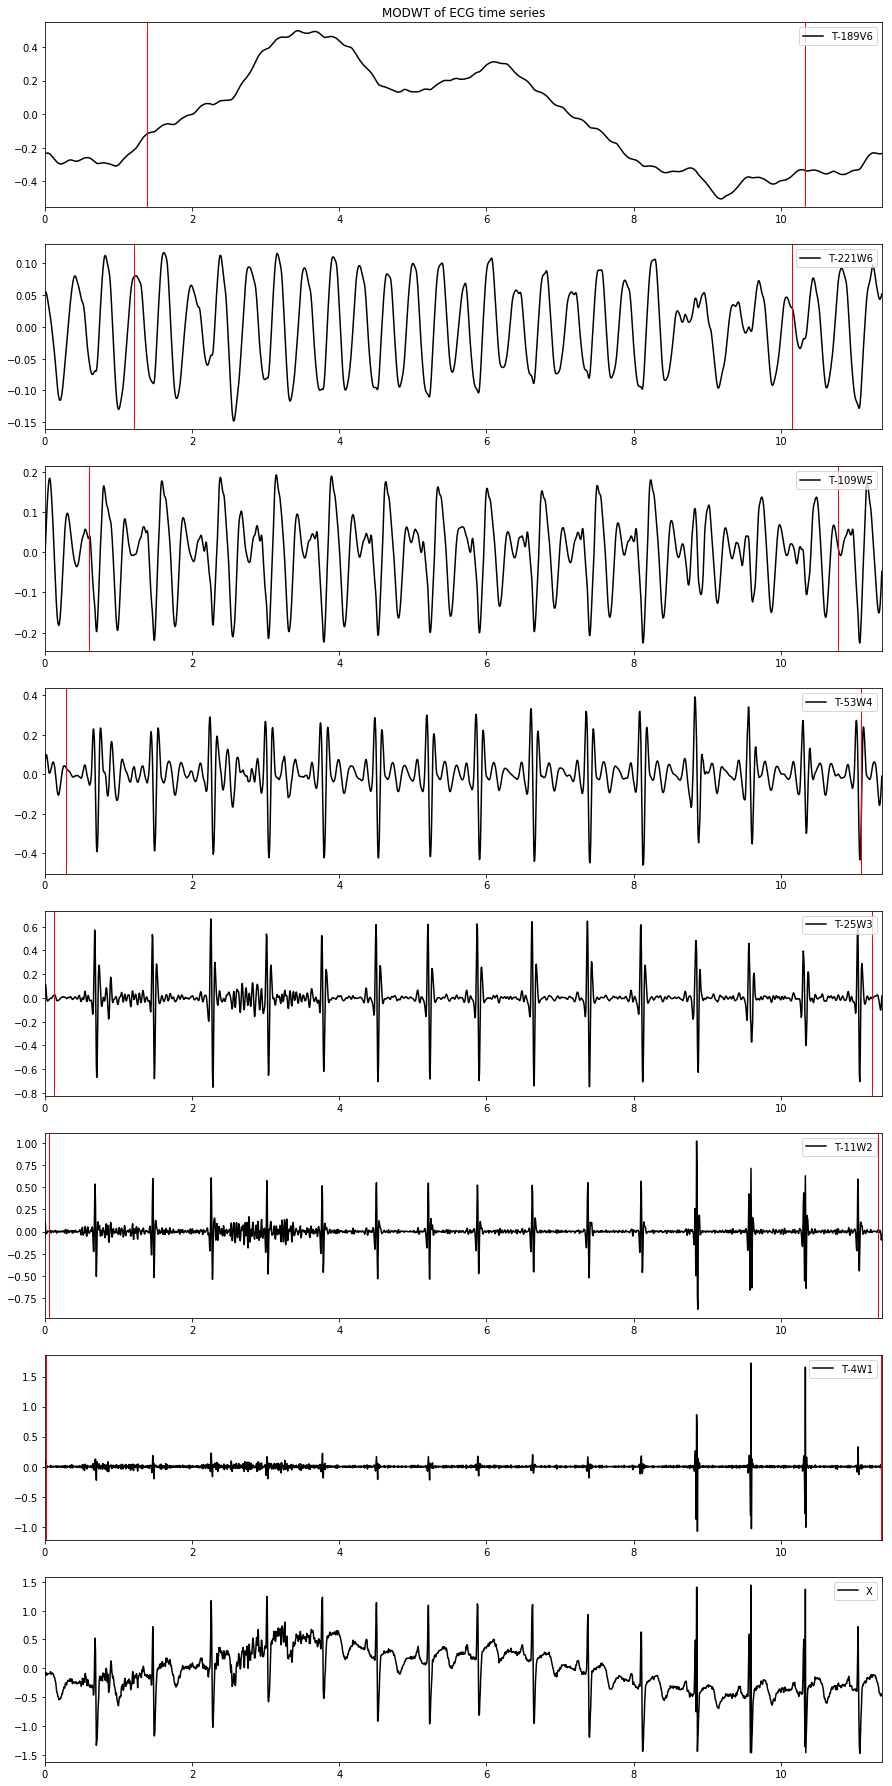

In [4]:
test1()

In [5]:
def test2():
    """
    Reproduce plot of Figure 184 from WMTSA

    Input:
        None
    Output:
        None
    """
    X = np.loadtxt('../data/heart.dat')
    N = np.shape(X)[0]
    L = 8
    (W, V) = pyramid(X, 'LA8', 6)
    (D, S) = get_DS(X, W, 'LA8', 6)
    plt.figure(1, figsize=(15, 32))
    plt.subplot2grid((8, 1), (7, 0))
    dt = 1.0 / 180.0
    t = dt * np.arange(0, N)
    plt.plot(t, X, 'k', label='X')
    plt.xlim([np.min(t), np.max(t)])
    plt.legend(loc=1)
    for j in range(0, 6):
        plt.subplot2grid((8, 1), (6 - j, 0))
        plt.plot(t, D[j], 'k', label='D' + str(j + 1))
        Lj = (2 ** (j + 1) - 1) * (L - 1) + 1
        plt.axvline(dt * (Lj - 2), linewidth=1, color='red')
        plt.axvline(dt * (N - Lj + 1), linewidth=1, color='red')
        plt.xlim([np.min(t), np.max(t)])
        plt.legend(loc=1)
    plt.subplot2grid((8, 1), (0, 0))
    plt.plot(t, S[6], 'k', label='S6')
    Lj = (2 ** 6 - 1) * (L - 1) + 1
    plt.axvline(dt * (Lj - 2), linewidth=1, color='red')
    plt.axvline(dt * (N - Lj + 1), linewidth=1, color='red')
    plt.xlim([np.min(t), np.max(t)])
    plt.legend(loc=1)
    plt.title('MODWT of ECG time series')
    plt.savefig('../figures/MODWT/ECG_DS.eps', format='eps')
    plt.show()

Compute MODWT MRA of the ECG time series from WMTSA.

Reproduce Figure 184 in WMTSA.

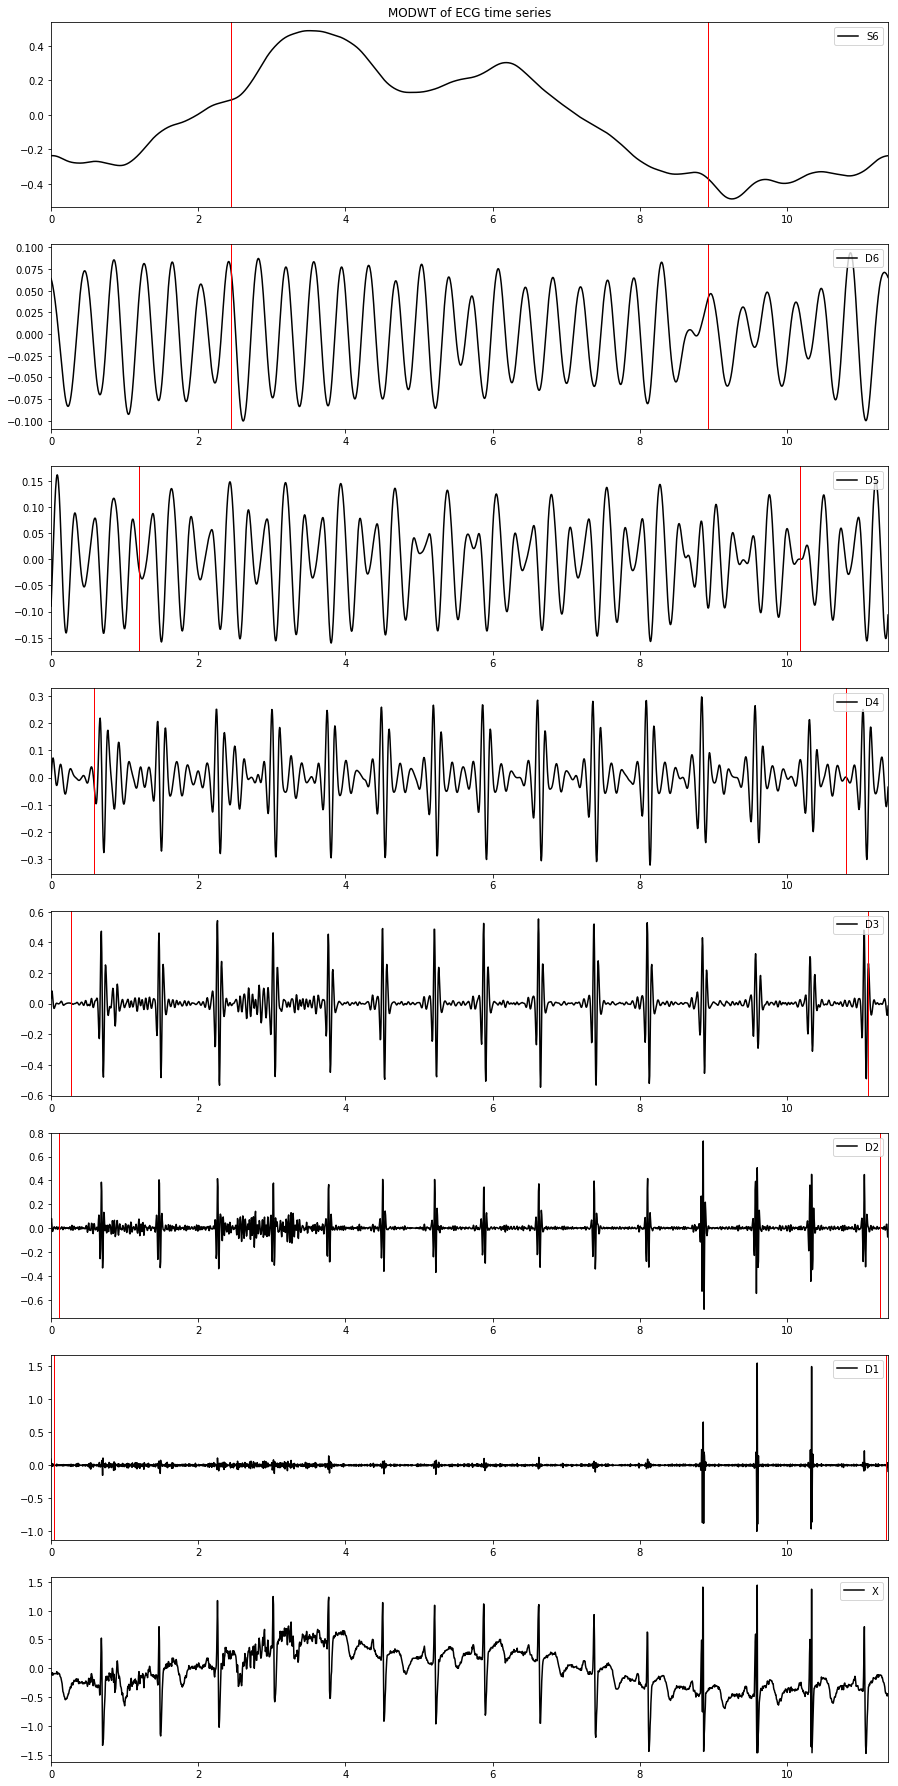

In [6]:
test2()

## 5.8 Example: Subtidal Seal Level Fluctuations

In [7]:
def test3(xmin, xmax, name_output):
    """
    Reproduce plots of Figures 186 and 187 from WMTSA

    Input:
        type xmin = float
        xmin = Time where to begin the plot
        type xmax = float
        xmax = Time where to and the plot
        type name_output = string
        name_output = Name of image file containing the plot
    Output:
        None
    """
    X = np.loadtxt('../data/subtidal.dat')
    N = np.shape(X)[0]
    L = 8
    (W, V) = pyramid(X, 'LA8', 7)
    (D, S) = get_DS(X, W, 'LA8', 7)
    plt.figure(1, figsize=(15, 36))
    plt.subplot2grid((9, 1), (8, 0))
    t1980 = 1980.0 + (0.5 / 366.0) * np.arange(10, 732)
    t1981 = 1981.0 + (0.5 / 365.0) * np.arange(0, 730)
    t1982 = 1982.0 + (0.5 / 365.0) * np.arange(0, 730)
    t1983 = 1983.0 + (0.5 / 365.0) * np.arange(0, 730)
    t1984 = 1984.0 + (0.5 / 366.0) * np.arange(0, 732)
    t1985 = 1985.0 + (0.5 / 365.0) * np.arange(0, 730)
    t1986 = 1986.0 + (0.5 / 365.0) * np.arange(0, 730)
    t1987 = 1987.0 + (0.5 / 365.0) * np.arange(0, 730)
    t1988 = 1988.0 + (0.5 / 366.0) * np.arange(0, 732)
    t1989 = 1989.0 + (0.5 / 365.0) * np.arange(0, 730)
    t1990 = 1990.0 + (0.5 / 365.0) * np.arange(0, 730)
    t1991 = 1991.0 + (0.5 / 365.0) * np.arange(0, 720)
    t = np.concatenate((t1980, t1981, t1982, t1983, t1984, t1985, t1986, t1987, t1988, t1989, t1990, t1991))
    plt.plot(t, X, 'k', label='X')
    plt.xlim([xmin, xmax])
    plt.legend(loc=1)
    for j in range(0, 7):
        plt.subplot2grid((9, 1), (7 - j, 0))
        plt.plot(t, D[j], 'k', label='D' + str(j + 1))
        Lj = int((2 ** (j + 1) - 1) * (L - 1) + 1)
        plt.axvline(t[Lj - 2], linewidth=1, color='red')
        plt.axvline(t[N - Lj + 1], linewidth=1, color='red')
        plt.xlim([xmin, xmax])
        plt.legend(loc=1)
    plt.subplot2grid((9, 1), (0, 0))
    plt.plot(t, S[7], 'k', label='S7')
    Lj = (2 ** 7 - 1) * (L - 1) + 1
    plt.axvline(t[Lj - 2], linewidth=1, color='red')
    plt.axvline(t[N - Lj + 1], linewidth=1, color='red')
    plt.xlim([xmin, xmax])
    plt.legend(loc=1)
    plt.title('MODWT of Crescent City subtidal variations')
    plt.savefig('../figures/MODWT/' + name_output + '.eps', format='eps')
    plt.show()

Compute MODWT MRA of the subtidal time series from WMTSA.

Reproduce Figures 186 and 187 in WMTSA.

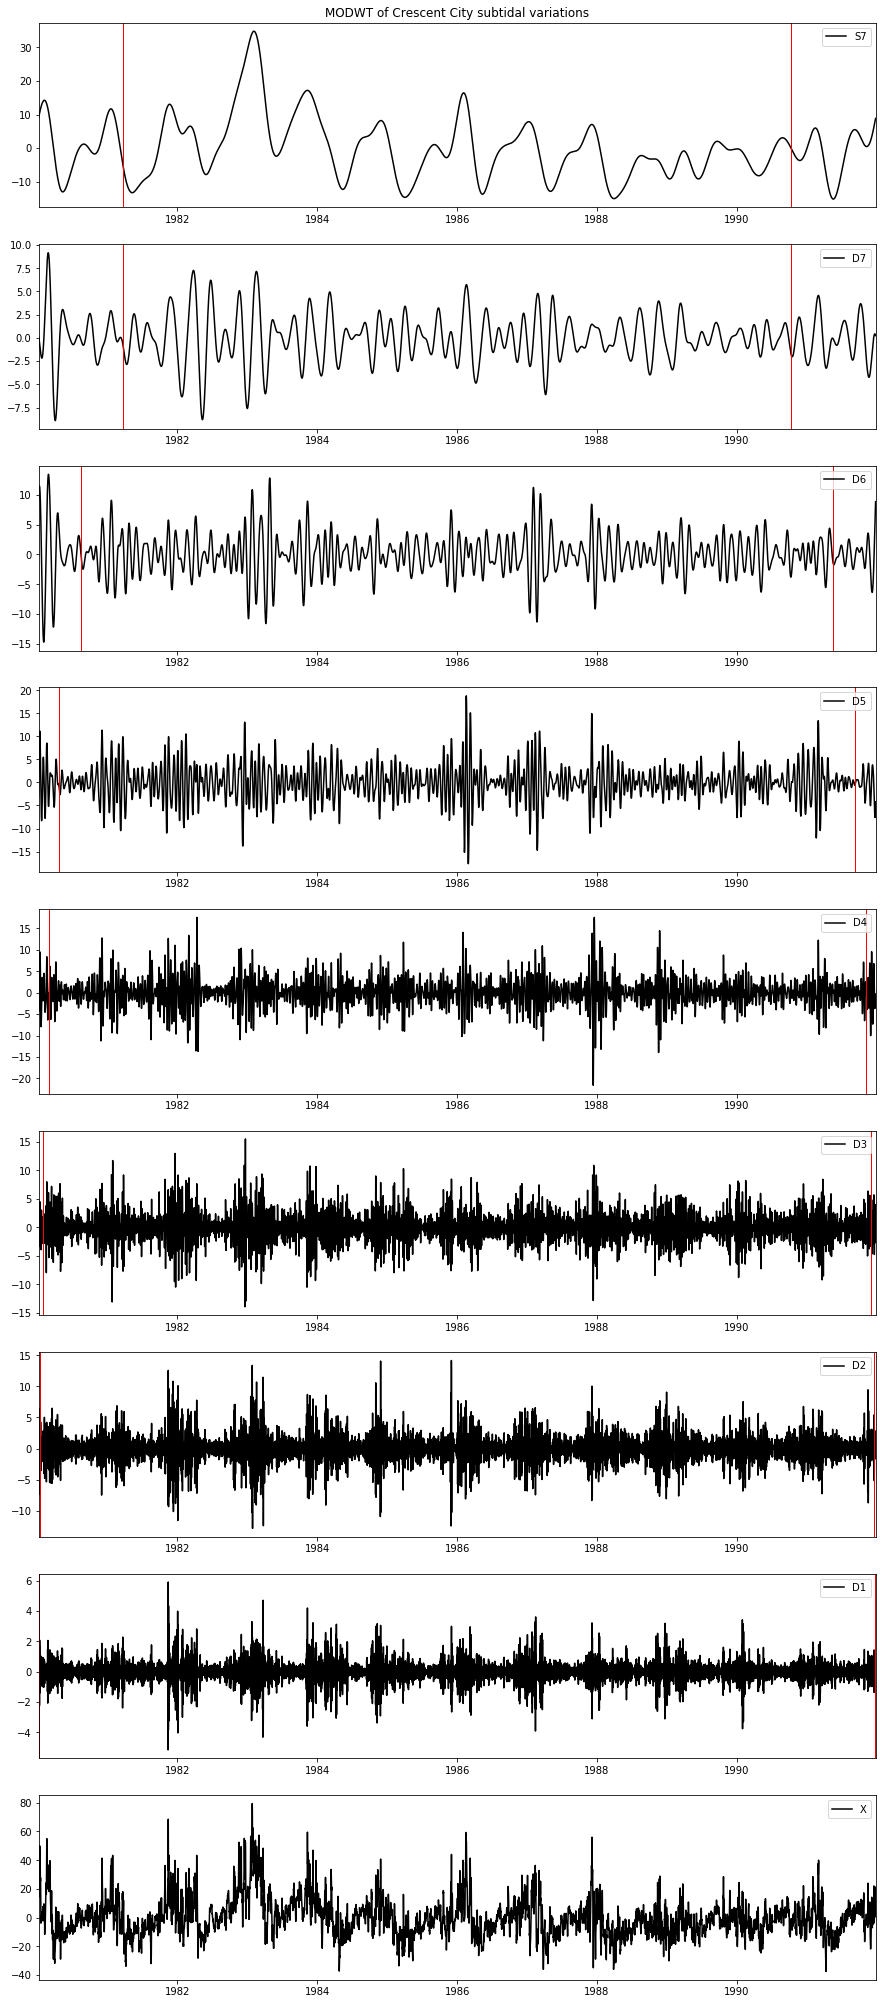

In [8]:
test3(1980.0 + 5.0 / 366.0, 1991 + 359.5 / 365.0, 'subtidal_1980-1991')

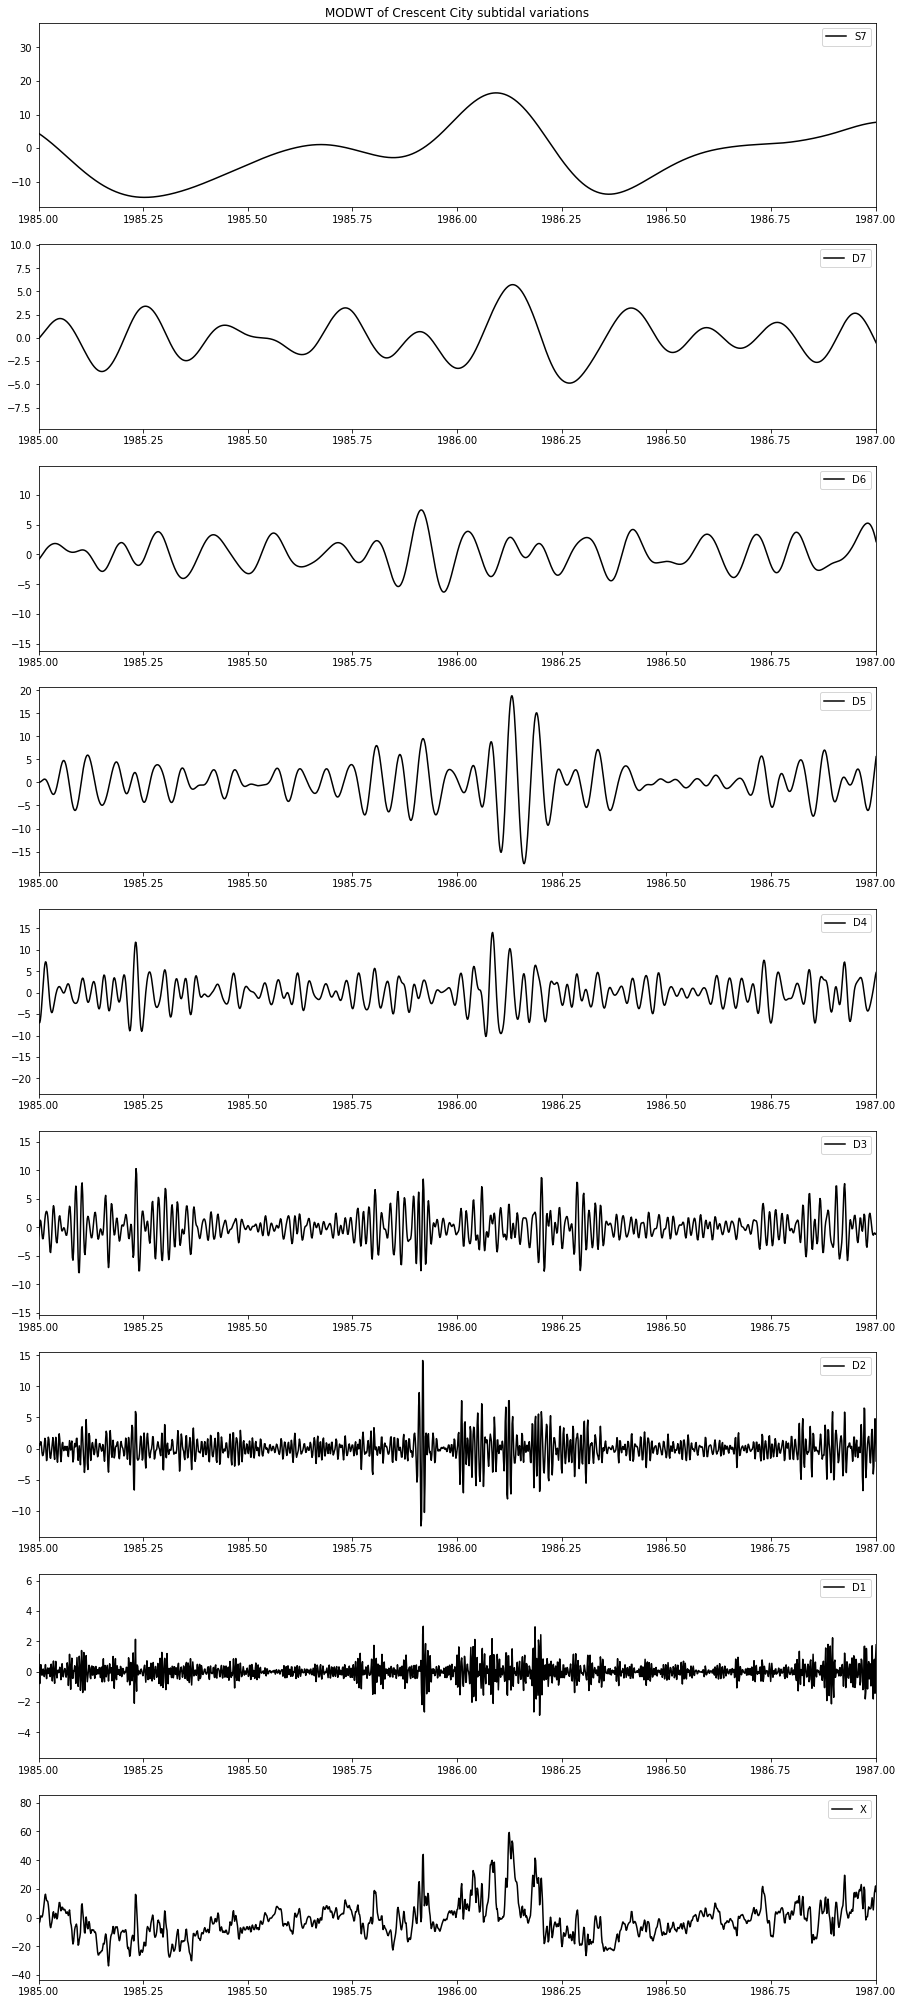

In [9]:
test3(1985.0, 1987.0, 'subtidal_1985-1986')

## 5.9 Example: Nile River Minima

In [10]:
def test4():
    """
    Reproduce plot of Figure 192 from WMTSA

    Input:
        None
    Output:
        None
    """
    X = np.loadtxt('../data/Nile.dat')
    N = np.shape(X)[0]
    L = 2
    (W, V) = pyramid(X, 'Haar', 4)
    (D, S) = get_DS(X, W, 'Haar', 4)
    plt.figure(1, figsize=(15, 24))
    plt.subplot2grid((6, 1), (5, 0))
    t = np.arange(622, 1285, 1)
    plt.plot(t, X, 'k', label='X')
    plt.xlim([np.min(t), np.max(t)])
    plt.legend(loc=1)
    for j in range(0, 4):
        plt.subplot2grid((6, 1), (4 - j, 0))
        plt.plot(t, D[j], 'k', label='D' + str(j + 1))
        Lj = int((2 ** (j + 1) - 1) * (L - 1) + 1)
        plt.axvline(t[Lj - 2], linewidth=1, color='red')
        plt.axvline(t[N - Lj + 1], linewidth=1, color='red')
        plt.xlim([np.min(t), np.max(t)])
        plt.legend(loc=1)
    plt.subplot2grid((6, 1), (0, 0))
    plt.plot(t, S[4], 'k', label='S4')
    Lj = (2 ** 4 - 1) * (L - 1) + 1
    plt.axvline(t[Lj - 2], linewidth=1, color='red')
    plt.axvline(t[N - Lj + 1], linewidth=1, color='red')
    plt.xlim([np.min(t), np.max(t)])
    plt.legend(loc=1)
    plt.title('MODWT of Nile river minima')
    plt.savefig('../figures/MODWT/Nile.eps', format='eps')
    plt.show()

Compute MODWT MRA of the Nile river time series from WMTSA.

Reproduce Figure 192 in WMTSA.

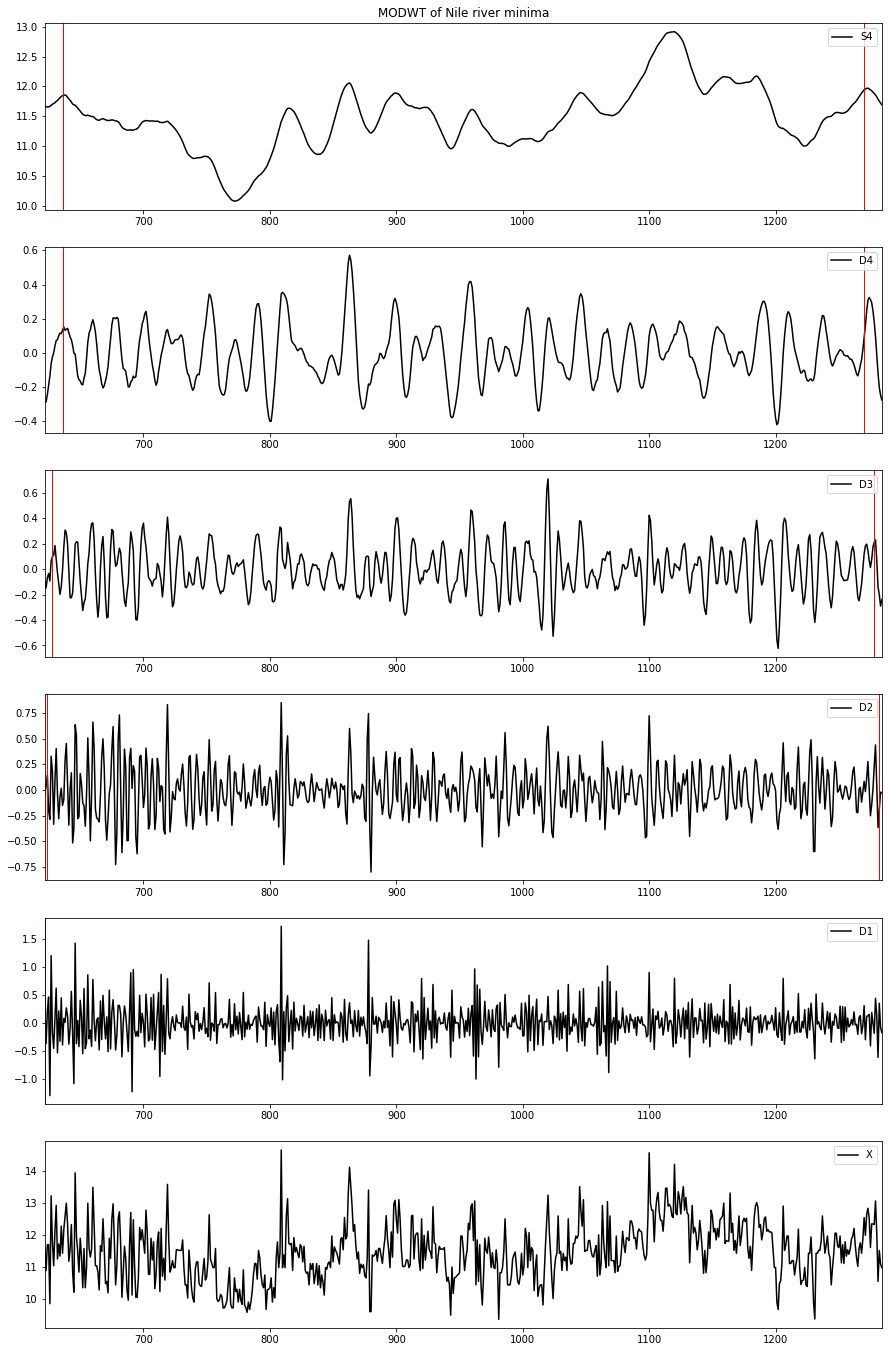

In [11]:
test4()

## 5.10 Example: Ocean Shear Measurements

In [12]:
def test5():
    """
    Reproduce plot of Figure 194 from WMTSA

    Input:
        None
    Output:
        None
    """
    X = np.loadtxt('../data/msp.dat')
    N = np.shape(X)[0]
    L = 8
    (W, V) = pyramid(X, 'LA8', 6)
    (D, S) = get_DS(X, W, 'LA8', 6)
    plt.figure(1, figsize=(15, 32))
    plt.subplot2grid((8, 1), (7, 0))
    dt = 0.1
    t = 350.0 + dt * np.arange(0, N)
    plt.plot(t, X, 'k', label='X')
    plt.xlabel('depth (meters)')
    plt.xlim([np.min(t), np.max(t)])
    plt.legend(loc=1)
    for j in range(0, 6):
        plt.subplot2grid((8, 1), (6 - j, 0))
        plt.plot(t, D[j], 'k', label='D' + str(j + 1))
        Lj = (2 ** (j + 1) - 1) * (L - 1) + 1
        plt.axvline(t[Lj - 2], linewidth=1, color='red')
        plt.axvline(t[N - Lj + 1], linewidth=1, color='red')
        plt.xlim([np.min(t), np.max(t)])
        plt.legend(loc=1)
    plt.subplot2grid((8, 1), (0, 0))
    plt.plot(t, S[6], 'k', label='S6')
    Lj = (2 ** 6 - 1) * (L - 1) + 1
    plt.axvline(t[Lj - 2], linewidth=1, color='red')
    plt.axvline(t[N - Lj + 1], linewidth=1, color='red')
    plt.xlim([np.min(t), np.max(t)])
    plt.legend(loc=1)
    plt.title('MODWT of ocean shear time series')
    plt.savefig('../figures/MODWT/ocean_shear.eps', format='eps')
    plt.show()

Compute MODWT MRA of the ocean shear time series from WMTSA.

Reproduce Figure 194 in WMTSA.

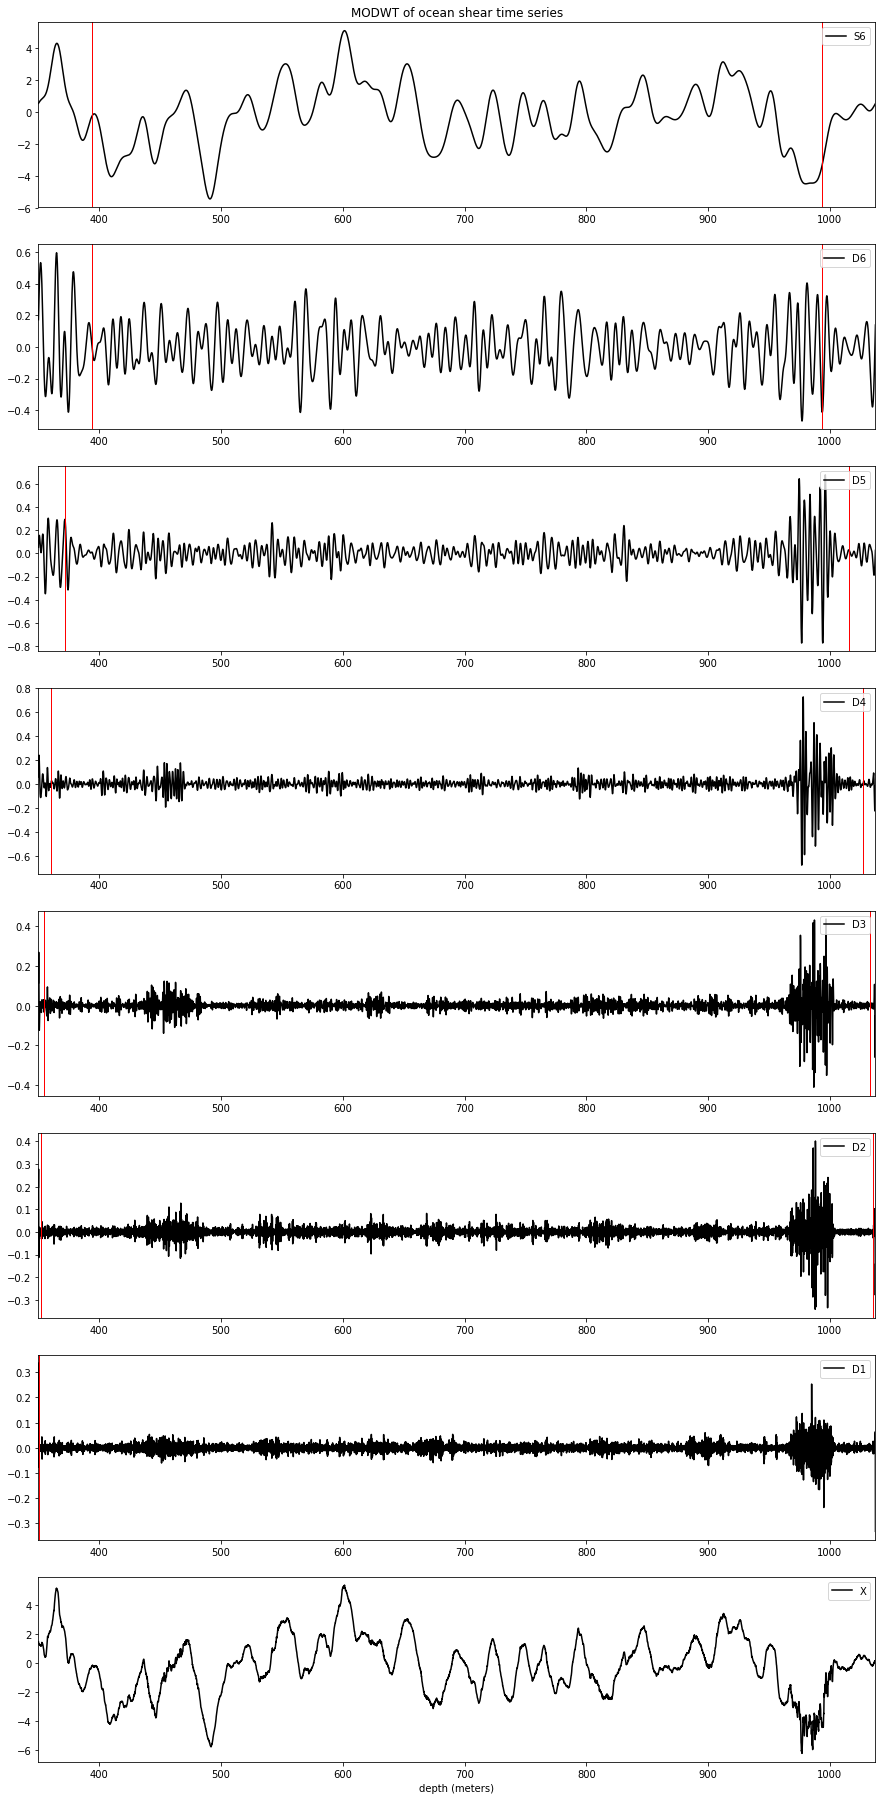

In [13]:
test5()